# Pandas
### Learning Objectives
>- Understand what Pandas is and why it's useful
>- Load and explore a dataset using Pandas
>- Perform basic data cleaning and analysis
>- Use Pandas for filtering, grouping, and summarizing data

#### What is Pandas?
>- Pandas is a powerful open-source Python library used for data manipulation and analysis. It provides easy-to-use data structures and functions designed to work with structured data, especially tabular data like spreadsheets and SQL tables.
>
>- It is built on top of NumPy, which means it inherits NumPy’s speed and efficiency for numerical operations, while adding more intuitive and flexible tools for working with labeled data.

#### Key Features
>- Series: 1D labeled array (like a column)
>- DataFrames: 2D labeled data structure (like a table)
>- Data Exploration:
>    - Data cleaning: Handle missing data, duplicates, and formatting
>    - Data transformation: Filtering, grouping, and aggregation
>    - Input/output: Read/write from CSV, Excel, SQL, JSON, etc.
>    - Time series support: Powerful tools for working with dates and times

#### Pandas Introduction

In [3]:
# Pandas Series: 1D labeled array (like a column)
import pandas as pd

names = pd.Series(["Sue", "Flay", "Justin", "Time"])
print(type(names))
#names

<class 'pandas.core.series.Series'>


In [4]:
# Pandas DataFrame: 2D labeled data structure (like a table)
import pandas as pd

data = {
    "Name": ["Sue", "Flay", "Justin", "Time"],
    "Exam1": [88, 78, 98, 42],
    "Major": ["CMDA", "CS", None, "Aerospace"]
}
df = pd.DataFrame(data)
print(type(df))
#df

<class 'pandas.core.frame.DataFrame'>


### Data Exploration:
>- Load a Dataset
>- Inspection
>- Filtering
>- Grouping and Aggregation
>- Transformation
>- Plotting

#### Loading a Dataset

>- Seaborn has a built-in dataset - thank you Seaborn!
>    - sns.load_dataset('datasetName')
>    - sns.get_dataset_names()
>- Pandas reads from files:
>    - pd.read_csv('fileName.csv')
>    - pd.read_excel('fileName.xlsx')
>    - pd.read_json('fileName.json')
>    - And many more!

In [14]:
# Seaborn includes several built-in datasets that are perfect for Pandas practice:
import seaborn as sns 
import pandas as pd

#print(*sns.get_dataset_names()) # all the built-in seaborn datasets - thank you seaborn! # u see all the names of datasets

penguins = sns.load_dataset('penguins')
print(type(penguins)) # seborn built upon pandas DataFrame and matplotlib too
penguins

<class 'pandas.core.frame.DataFrame'>


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


#### Inspection

>- display(df)
>- Initial Inspection
>    - df.head() or df.tail() or df.loc[]
>    - df.columns
>    - df.info() or df.describe()
>    - df.isna().sum() # is not a number or is not availbe
>    - df.dropna() or df.fillna() # when data is missing from datat set you have to figure out what you wanna do w/ it 
>    - df.value_counts()
>- Further Inspection
>    - df.mean(numeric_only=True) .min() .max() .median() .std()
>    - df.["columnName"]
>    - df.["columnName"].value_counts()
>        - .sort_values() .sort_values(ascending=False)
>        - .unique()
>        - .nunique()
>        - .mean(numeric_only=True) .min() .max() .median() .std()

In [ ]:
# Inspecting
display(penguins.head(3)) #gives first three elements of the dataframe
#if you print out first one it loses nice display so use display function in jupyter notebook - preserves nice formatting 
print("-------------------------")
print("|    penguins.info()    |")
print("-------------------------")
penguins.info()

# print("-------------------------")
# print("|  penguins.describe()  |")
# print("-------------------------")
# print(penguins.describe())

print("-------------------------") 
print("| penguins.isna.sum() |")
print("-------------------------")
penguins.isna().sum() #tels you how much data is missing in each column/in ur data set # part of initial inspection 

# penguins.head() # first 5 rows
# penguins.tail() # last 5 rows

penguins.mean(numeric_only= True ) # mean of all numeric columns
penguins ['island'].nunique()#` tells you how many unique values are in the 'island' column
penguins ['island'].value_counts() # counts how many times each unique value appears in the 'island' column
# penguins ['island'].value_counts(normalize=True) # gives proportions instead of counts
penguins['species'].value_counts()
# penguins['species'].value_counts(normalize=True) # proportions of each species

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


-------------------------
|    penguins.info()    |
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
-------------------------
| penguins.isna.sum() |
-------------------------


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

**Practice Inspecting**
1. Use the `df.describe()`, `df.columns`, `df.head()` to see the differences.
2. Use `df.isna().sum()` to see the summary.
3. Use `df.loc[0]`, `df.loc[5: 15]` to see specific entries.
4. Use `df["columnName"].unique()` to get all unique values.
5. Use `df["columnName"].value_counts()` to count how many times each unique value appears.

In [7]:
# Practice Inspecting
penguins["island"]

0      Torgersen
1      Torgersen
2      Torgersen
3      Torgersen
4      Torgersen
         ...    
339       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 344, dtype: object

#### Filtering

>- Inspection: df["body_mass_g"]
>    - Filtering: `df[df["body_mass_g"] > 5800]`
>- Inspection: df["sex"].isna()
>    - Filtering: `df[df["sex"].isna()]`
>- Boolean Filtering (Multiple Conditions)
>    - Operators: & |
>    - `df[(df["island"] == "Torgersen") & (df['bill_depth_mm'] > 18)]`
>    - `df[(df["species"] != "Adelie") | (df["island"] == 'Dream')]`
>- Filtering with .isin()
>    - `df[df["island"].isin(["Torgersen", "Biscoe"])]`
>- Filtering with .str Method
>    - `df[df["island"].str.startswith("D")]`
>    - `df[df['species'].str.contains("d")]`

In [8]:
# Exploring Filtering

penguins[penguins["body_mass_g"] > 5800]
#penguins[(penguins["body_mass_g"] > 5800) & (penguins['sex'] != 'Male')]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
233,Gentoo,Biscoe,48.4,14.6,213.0,5850.0,Male
235,Gentoo,Biscoe,49.3,15.7,217.0,5850.0,Male
237,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,Male
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male
297,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,Male
299,Gentoo,Biscoe,45.2,16.4,223.0,5950.0,Male
331,Gentoo,Biscoe,49.8,15.9,229.0,5950.0,Male
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,Male
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,Male


#### Grouping and Aggregation

>- Group and Aggregate One Column
>    - Inspection: df['species'].unique()
>    - Gp + Agg: `df.groupby('species').count()`
>    - Gp + Agg + Ispn: df.groupby('species').count()['island']
>    - Gp + Agg: df.groupby('island').mean(numeric_only=True)
>- Group and Aggregate Multiple Columns
>    - `df.groupby(["island", "sex", "species"]).mean().round(2)`
>    - df.drop(columns=["island"]).groupby(["species", "sex"]).median()
>    - df.groupby(["species", "sex"]).median(numeric_only=True)
>- Aggregation per Column
>    - `df.groupby("species").agg({"island": "count"})`
>    - df.groupby("island").agg({"species": ["count", "unique"]})
>    - df.groupby("island").agg({"species": "count", "body_mass_g": "mean"})
>    - df.groupby(["sex", "island"]).agg({"species": "count", "flipper_length_mm": "max"})
>- Multiple Aggregations on Multiple Columns
>    - cols = ["body_mass_g", "flipper_length_mm"]<br>
df.grouby("island")[cols].agg(["median", "mean", "min", "max"])

In [9]:
# Grouping and Aggregation
penguins = sns.load_dataset("penguins")

penguins.groupby("species").count()
#penguins.groupby("island").mean(numeric_only=True).round(2)


,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,152,151,151,151,151,146
Chinstrap,68,68,68,68,68,68
Gentoo,124,123,123,123,123,119


**Practice Grouping and Aggregation**
1. Get the count of each species.
1. Find the mean body mass by species.
1. Find the median flipper length by species and sex.
1. Group by species and find the count of the islands.
1. Find the sum of the body_mass_g by sex.
1. Group by species and find the unique values of island and the number of unique values of island. <br />
(hint: `.agg({"island": ["unique", "nunique"]}))`
1. Group by island and find the following: 
      - unique spieces values
      - number of unique spiece values
      - mean of bill_length_mm

In [10]:
# Practice Grouping
penguins = sns.load_dataset("penguins")

#### Plotting

>- `df.plot()`
>- `df.plot(kind="bar")`
>- Groupby or Filter then plot

<Axes: title={'center': 'This Line Plot Makes No Sense'}>

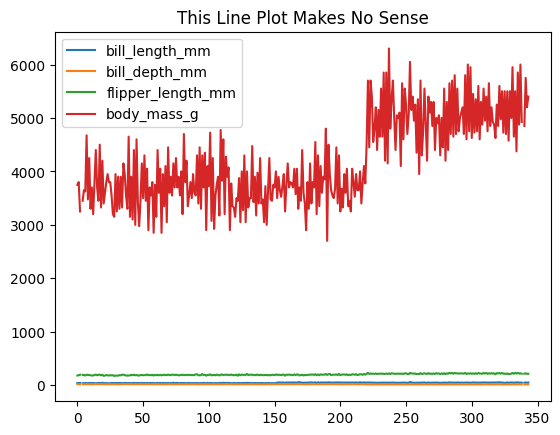

In [11]:
penguins = sns.load_dataset("penguins")

penguins.plot(title="This Line Plot Makes No Sense")
#penguins.groupby("bill_length_mm").mean(numeric_only=True).plot()


**Practice Plot**
1. Line Plot: groupby bill_length_mm and only plot body_mass_g
1. Line Plot: groupby bill_length_mm and plot everything but body_mass_g
1. Bar Plot: grouby by island and plot the body_mass_g mean value for each island
1. Bar Plot: of the averages of all numeric columns
1. Bar Plot: of the counts of the unique islands

In [12]:
# Practice Plotting
df = sns.load_dataset("penguins")


### Most Common Pandas Operations


>- Loading Data
>    - pd.read_csv("fileName.csv")
>    - pd.read_json("fileName.json")
>    - pd.read_excel("fileName.xlsx")
>
>- Exploring Data
>    - df.head()
>    - df.tail()
>    - df.info()
>    - df.describe()
>    - df.shape
>    - df.columns
>
>- Selecting Data
>    - df["column"]         # Single Column
>    - df[["col1", "col2"]] # Multiple Columns
>    - df.loc[0]            # Row by label
>
>- Filtering
>    - df[df["column"] > 100]
>    - df[df["col1"] > 50 & (df["col2"] == "A")]
>
>- Cleaning Data
>    - df.dropna()              # remove missing rows
>    - df.fillna(0)             # fill missing values
>    - df.drop_duplicates()     # remove duplicated
>    - df["column"].astype(int) # change data type
> 
>- Transforming 
>    - df["new_col"] = df["col1"] + df["col2"]
>    - df.rename(columns={"old": "new"}, inplace=True)
>    - df["column"].str.lower()
>    - df.sort_values("column", ascending=False)
>
>- Grouping and Aggregation
>    - df.groupby("category").mean()
>    - df.groupby("category")["column"].mean()
>    - df.groupby(["cat1", "cat2"]).agg({"val": "sum"})
> 
>- Plotting with Pandas
>    - df.plot()
>    - df.plot(kind="bar")